# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1

from dsutils.ml import *

# Data

In [4]:
data1 = pd.read_csv('emails.csv')
data2 = pd.read_csv('sms.csv')
data3 = pd.read_csv('Youtube01-Psy.csv')
data4 = pd.read_csv('Youtube02-KatyPerry.csv')
data5 = pd.read_csv('Youtube03-LMFAO.csv')
data6 = pd.read_csv('Youtube04-Eminem.csv')
data7 = pd.read_csv('Youtube05-Shakira.csv')
data8 = pd.read_csv('spam_or_not_spam.csv')

In [5]:
data1.head()

,text,spam
0,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
3,"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1


In [6]:
data2.head()

,Unnamed: 0,label,message,length
0,0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,1,ham,Ok lar... Joking wif u oni...,29
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,3,ham,U dun say so early hor... U c already then say...,49
4,4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [7]:
data3.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,"Hey guys check out my new channel and our first vid THIS IS US THE MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment and please subscribe!!!!",1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [8]:
data4.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www.MyLeaderGate.com/moretraffic﻿,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SONES please....we're against vips....please help us.. &gt;.&lt;﻿,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,"Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to helping pay for vet bills/and or helping them find homes! I will place an extra emphasis on helping disabled animals, ones otherwise would just be put to sleep by other animal organizations. Donate please. http://www.gofundme.com/Angels-n-Wingz﻿",1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,1


In [9]:
data5.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6kCPj8&amp;t=2m19s"">2:19</a> best part﻿",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />But I don&#39;t want to be a human, I want to be a sexy fucking giraffe.<br /><br /><br />I already have the money for the surgery to elongate my spinal core, the surgery to change my skin pigment, and everything else! Like this post so others can root me on in my dream!!!!<br /><br /><br />Im fucking with you, I make music, check out my first song! <a rel=""nofollow"" class=""ot-hashtag"" href=""https://plus.google.com/s/%23giraffebruuh"">#giraffebruuh</a>﻿",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [10]:
data6.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=""nofollow"" class=""ot-hashtag"" href=""https://plus.google.com/s/%23active"">#active</a> youtube views Right now. The only thing she used was pimpmyviews. com﻿",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [11]:
data7.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach one billion!! Share it and replay it! ﻿",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [12]:
data8.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER NUMBER NUMBER ict NUMBER and the relevant part of my mh_profile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one that s explicit on the command line from the search popup and the one that comes from mh_profile do get created kre ps this is still using the version of the code form a day ago i haven t been able to reach the cvs repository today local routing issue i think _______________________________________________ exmh workers mailing list exmh workers URL URL,0
1,martin a posted tassos papadopoulos the greek sculptor behind the plan judged that the limestone of mount kerdylio NUMBER miles east of salonika and not far from the mount athos monastic community was ideal for the patriotic sculpture as well as alexander s granite features NUMBER ft high and NUMBER ft wide a museum a restored amphitheatre and car park for admiring crowds are planned so is this mountain limestone or granite if it s limestone it ll weather pretty fast yahoo groups sponsor NUMBER dvds free s p join now URL to unsubscribe from this group send an email to forteana unsubscribe URL your use of yahoo groups is subject to URL,0
2,man threatens explosion in moscow thursday august NUMBER NUMBER NUMBER NUMBER pm moscow ap security officers on thursday seized an unidentified man who said he was armed with explosives and threatened to blow up his truck in front of russia s federal security services headquarters in moscow ntv television reported the officers seized an automatic rifle the man was carrying then the man got out of the truck and was taken into custody ntv said no other details were immediately available the man had demanded talks with high government officials the interfax and itar tass news agencies said ekho moskvy radio reported that he wanted to talk with russian president vladimir putin police and security forces rushed to the security service building within blocks of the kremlin red square and the bolshoi ballet and surrounded the man who claimed to have one and a half tons of explosives the news agencies said negotiations continued for about one and a half hours outside the building itar tass and interfax reported citing witnesses the man later drove away from the building under police escort and drove to a street near moscow s olympic penta hotel where authorities held further negotiations with him the moscow police press service said the move appeared to be an attempt by security services to get him to a more secure location yahoo groups sponsor NUMBER dvds free s p join now URL to unsubscribe from this group send an email to forteana unsubscribe URL your use of yahoo groups is subject to URL,0
3,klez the virus that won t die already the most prolific virus ever klez continues to wreak havoc andrew brandt from the september NUMBER issue of pc world magazine posted thursday august NUMBER NUMBER the klez worm is approaching its seventh month of wriggling across the web making it one of the mos

## Integration

In [13]:
data = pd.DataFrame(columns=['Text', 'Spam'])

In [14]:
for i in trange(len(data1)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data1['text'][i].replace('Subject: ', '')],
        'Spam': [data1['spam'][i]]
    })])

for i in trange(len(data2)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data2['message'][i]],
        'Spam': [int(data2['label'][i] == 'spam')]
    })])

for i in trange(len(data3)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data3['CONTENT'][i]],
        'Spam': [data3['CLASS'][i]]
    })])

for i in trange(len(data4)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data4['CONTENT'][i]],
        'Spam': [data4['CLASS'][i]]
    })])
    
for i in trange(len(data5)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data5['CONTENT'][i]],
        'Spam': [data5['CLASS'][i]]
    })])

for i in trange(len(data6)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data6['CONTENT'][i]],
        'Spam': [data6['CLASS'][i]]
    })])  

for i in trange(len(data7)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data7['CONTENT'][i]],
        'Spam': [data7['CLASS'][i]]
    })])
    
for i in trange(len(data8)):
    data = pd.concat([data, pd.DataFrame({
        'Text': [data8['email'][i]],
        'Spam': [data8['label'][i]]
    })])    
    
data.drop_duplicates(inplace=True)
    
print('Done')


Done


In [15]:
print(len(data))

15497


0    4360
1    1368
Name: spam, dtype: int64
ham     4825
spam    747 
Name: label, dtype: int64
1    175
0    175
Name: CLASS, dtype: int64
1    175
0    175
Name: CLASS, dtype: int64
1    236
0    202
Name: CLASS, dtype: int64
1    245
0    203
Name: CLASS, dtype: int64
0    196
1    174
Name: CLASS, dtype: int64
0    2500
1    500 
Name: label, dtype: int64
0    12207
1    3290 
Name: Spam, dtype: int64


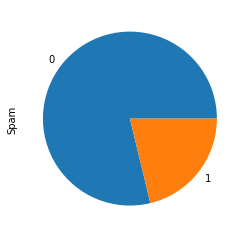

In [16]:
print(data1['spam'].value_counts())
print(data2['label'].value_counts())
print(data3['CLASS'].value_counts())
print(data4['CLASS'].value_counts())
print(data5['CLASS'].value_counts())
print(data6['CLASS'].value_counts())
print(data7['CLASS'].value_counts())
print(data8['label'].value_counts())
print(data['Spam'].value_counts())
data['Spam'].value_counts().plot.pie()

In [17]:
(len(data[data['Spam'] == 0])/len(data[data['Spam'] == 1]))

3.7103343465045593

In [18]:
data = pd.concat([
    data[data['Spam'] == 1],
    data[data['Spam'] == 1],
    data[data['Spam'] == 1],
    data[data['Spam'] == 1].sample(frac=0.71),
    data[data['Spam'] == 0]
]).sample(frac=1.00)

In [19]:
(len(data[data['Spam'] == 0])/len(data[data['Spam'] == 1]))

1.0000819269211862

# Text Cleaning

In [20]:
import nltk, re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import langdetect

def spell_correct(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"what's", "what is ", text) 
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\0s", "0", text)    
    return text

def remove_url(text):
    URL_REGEX = re.compile(r'''((http[s]?://)[^ <>'"{}|\\^`[\]]*)''')
    return URL_REGEX.sub(r' ', text)

def remove_handles(text):
    HANDLES_REGEX = re.compile(r'@\S+')
    return HANDLES_REGEX.sub(r' ', text)

def remove_incomplete_last_word(text):
    INCOMPLETE_LAST_WORD_REGEX = re.compile(r'\S+…')
    return INCOMPLETE_LAST_WORD_REGEX.sub(r' ', text )

remove_punc = lambda x : re.sub(r"\W", ' ', x)

remove_num = lambda x : re.sub(r"\d", ' ', x)

remove_extra_spaces = lambda x : re.sub(r"\s+", ' ', x)

remove_shortwords = lambda x: ' '.join(word for word in x.split() if len(word) > 2)

lower_case = lambda x : x.lower()

with open('stopwords.txt') as f:
    sw = map(lambda x : x.strip(), f.readlines())
stop_words = set(nltk.corpus.stopwords.words('english'))|set(sw)
remove_stopwords = lambda x: ' '.join(word for word in x.split() if word not in stop_words)

ps = PorterStemmer()
ps_stem = lambda x: ' '.join(ps.stem(word) for word in x.split())

wnl = WordNetLemmatizer()
wnl_lemmatize = lambda x: ' '.join(wnl.lemmatize(word) for word in x.split())

def tag_pos(x):
    tag_list =  nltk.pos_tag(nltk.word_tokenize(x))
    pos = ""
    for t in tag_list:
        pos += t[0] +'(' + t[1] +')' + ' '
    return pos

def cleanText(x, rsw, stm, lem, tgps):
    x = str(x)
    x = remove_url(x)
    x = lower_case(x)
    x = spell_correct(x)
    x = remove_punc(x)
    x = remove_num(x)
    x = remove_extra_spaces(x)
    x = remove_shortwords(x)
    
    if rsw:
        x = remove_stopwords(x)
    if stm:
        x = ps_stem(x)
    if lem:
        x = wnl_lemmatize(x)
    if tgps:
        x = tag_pos(x)
    return x

In [21]:
data['Text'] = data['Text'].progress_apply(lambda x : cleanText(x, True, False, False, False))

In [22]:
pd.Series(' '.join(data[data['Spam'] == 1]['Text']).split()).value_counts()[:20]

number         25796
free           5533 
email          4764 
please         4696 
money          4690 
business       4500 
com            4407 
get            4136 
information    3998 
url            3838 
mail           3773 
company        3718 
one            3658 
new            3446 
click          3350 
make           3330 
time           3263 
people         2752 
list           2709 
http           2542 
dtype: int64

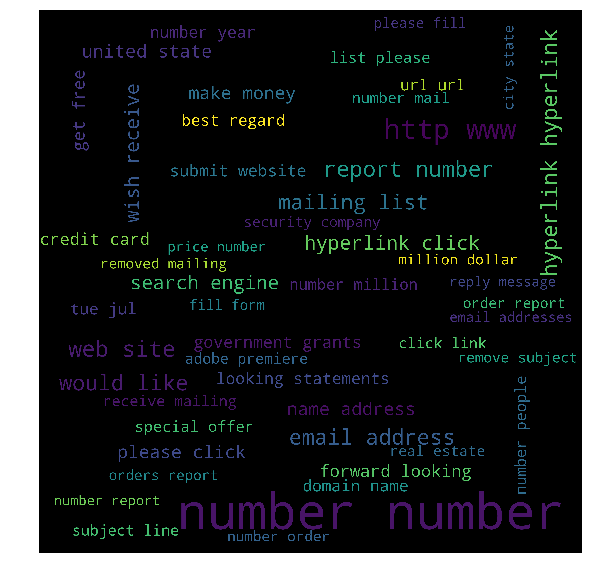

In [23]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

def df2corpus(df):
    corpus = ''
    for x in df:
        corpus += str(x) + '\n'
    return corpus

def buildWordCloud():
    wordcloud = WordCloud(width = 4500, height = 4500, 
                          background_color ='black', stopwords = stop_words, min_font_size = 10, 
                          max_words = 50).generate(df2corpus(data[data['Spam'] == 1]['Text']))
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    
buildWordCloud()

# Vectorizisation

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = TfidfVectorizer(smooth_idf=True)
vector = vectorizer.fit_transform(data['Text'])

In [26]:
y=data['Spam'].astype('int').values

In [27]:
print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (24413, 56759)
Y shape (24413,)


# Machine Learning

In [28]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB

Mean Loss 0.5546641835515147 +- 0.004200507890858885


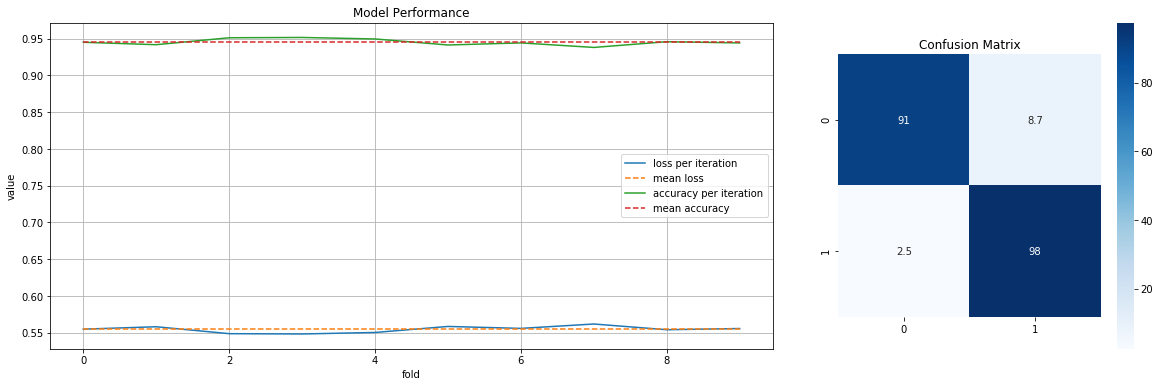

In [29]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB

Mean Loss 0.5709257802763388 +- 0.004269435863109955


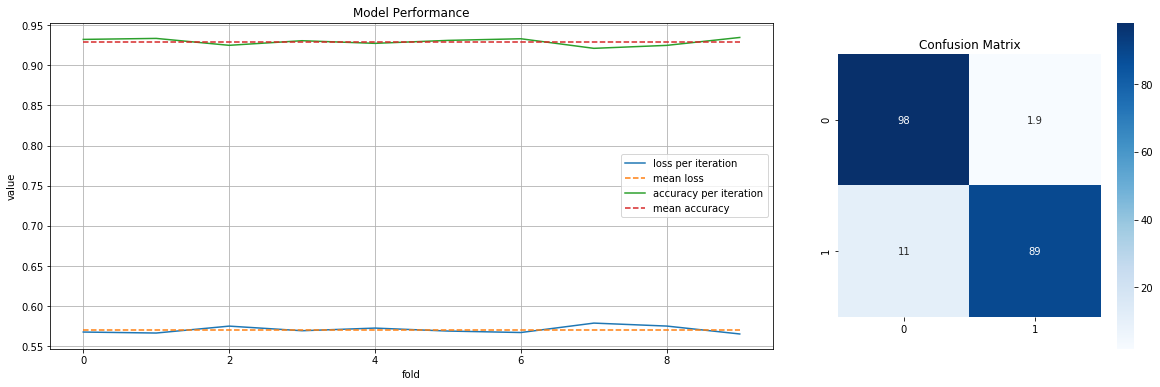

In [30]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression

Mean Loss 0.5499533681308988 +- 0.004282981278949278


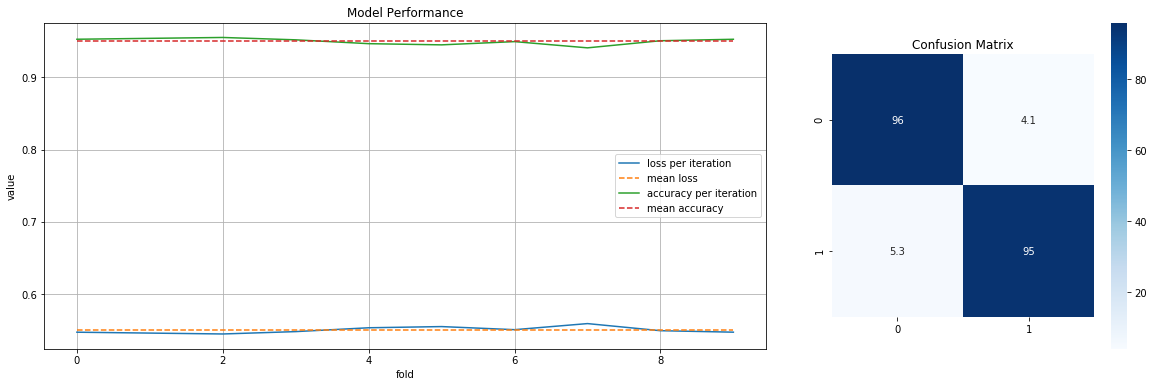

In [31]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=101, warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))

Mean Loss 0.5318894326783126 +- 0.002490837144785138


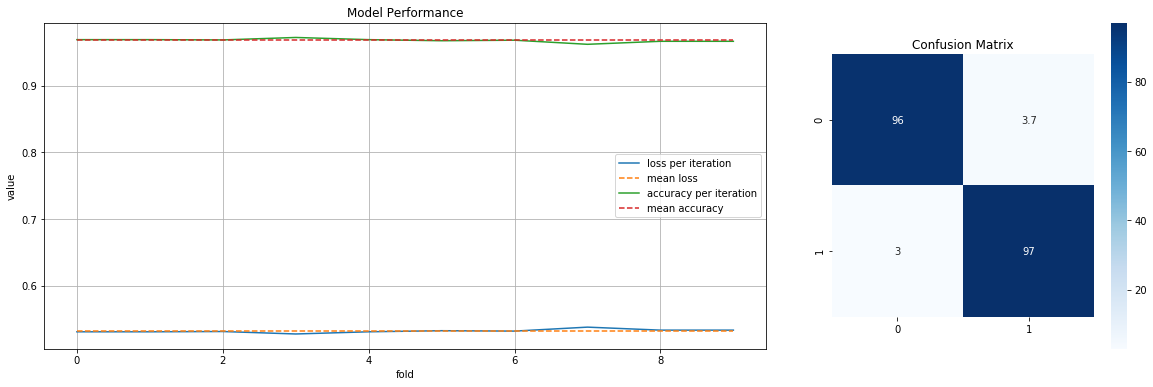

In [32]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss

Mean Loss 0.5704749941698148 +- 0.004142488967643951


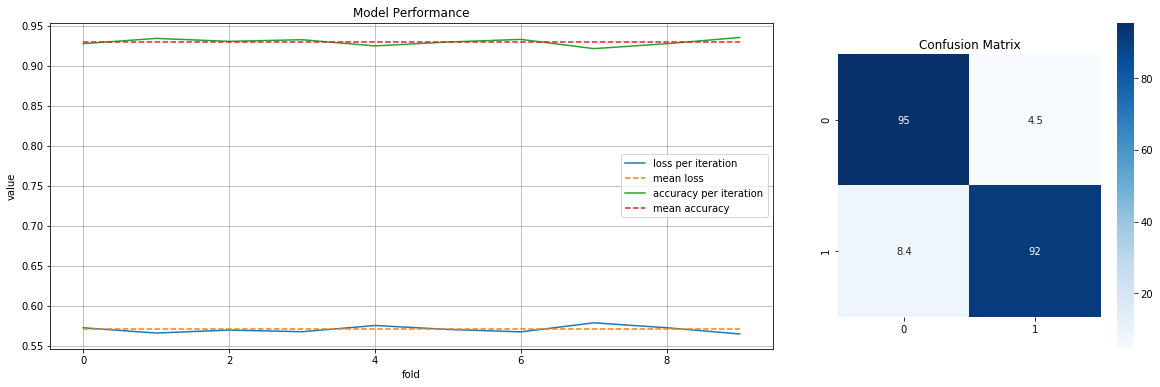

In [33]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))

Mean Loss 0.5427032642012729 +- 0.004380536810610706


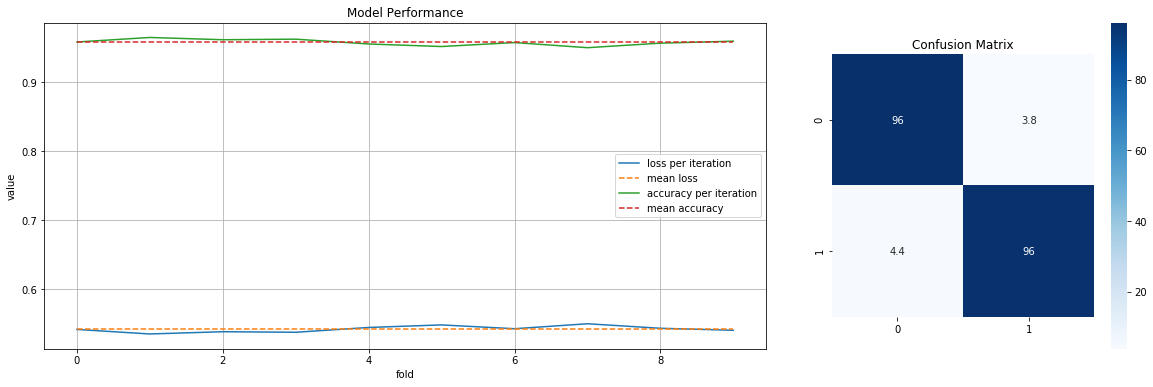

In [34]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss

Mean Loss 0.5546634619253339 +- 0.005394547188483343


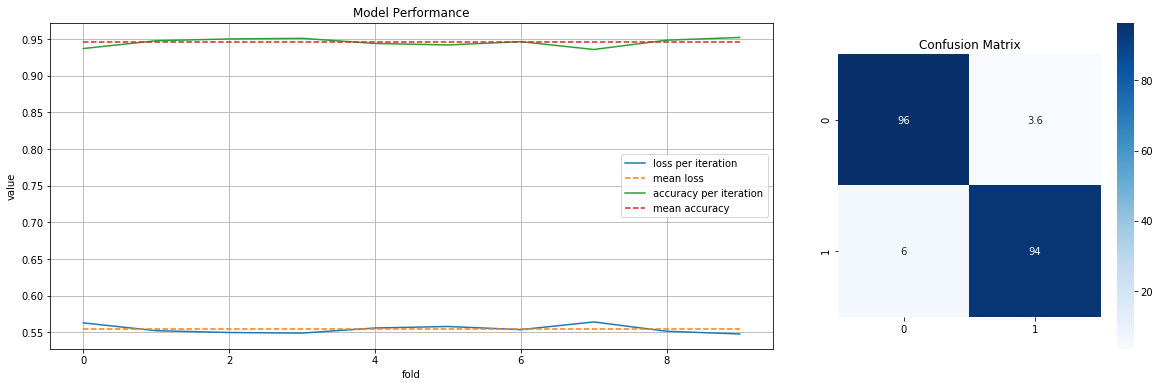

In [35]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))

Mean Loss 0.5268920172850804 +- 0.0034468083193685403


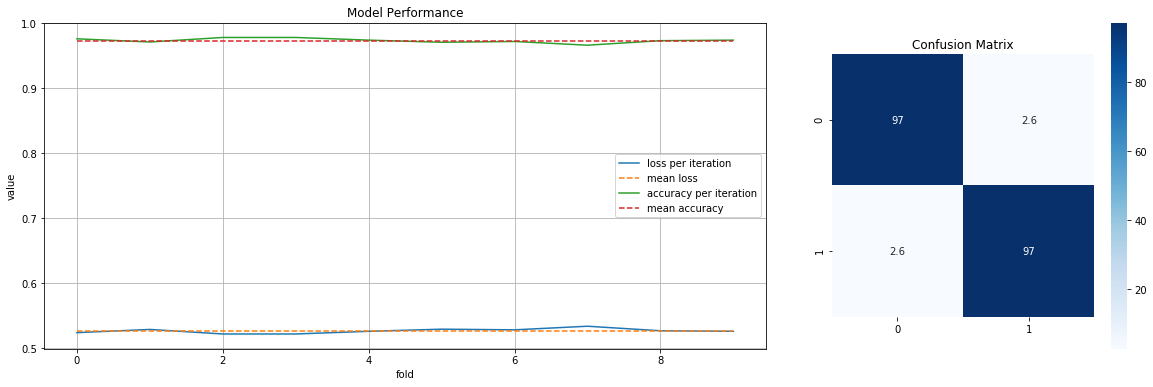

In [36]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss

Mean Loss 0.6414237235172788 +- 0.04380302262016113


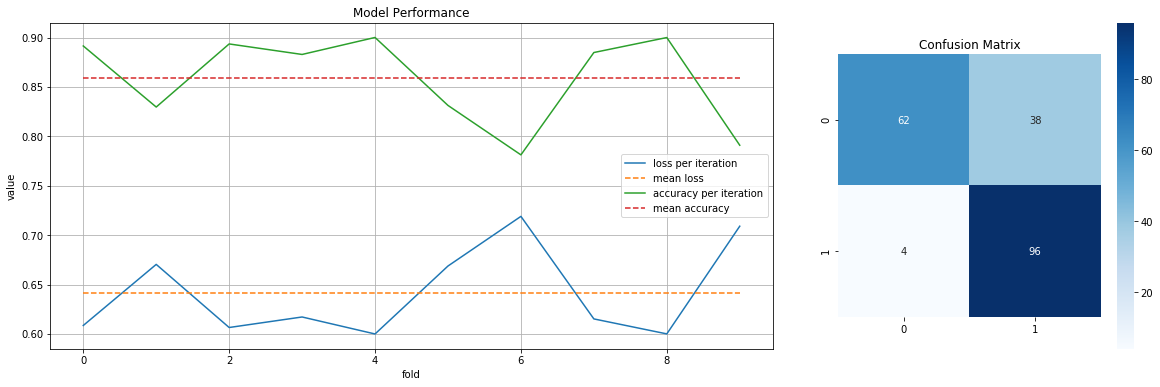

In [37]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))

Mean Loss 0.531070129920104 +- 0.005974896071484061


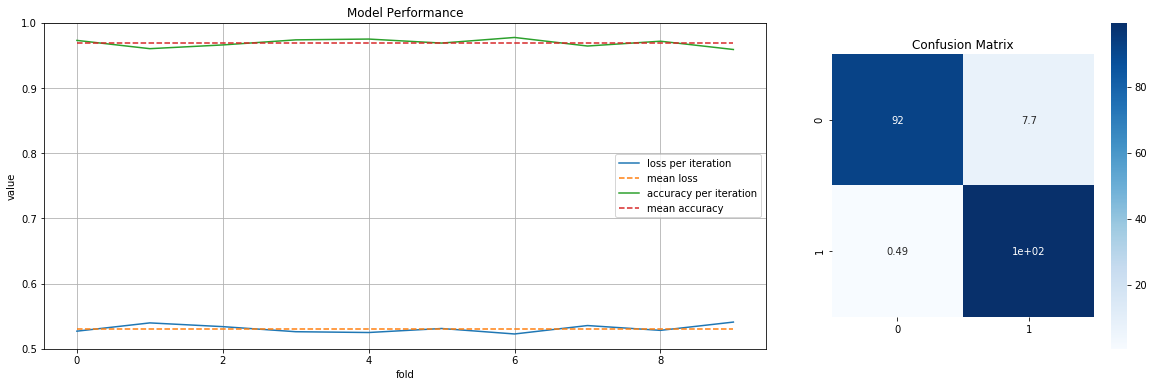

In [38]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree

Mean Loss 0.5489697783356993 +- 0.002695020500589816


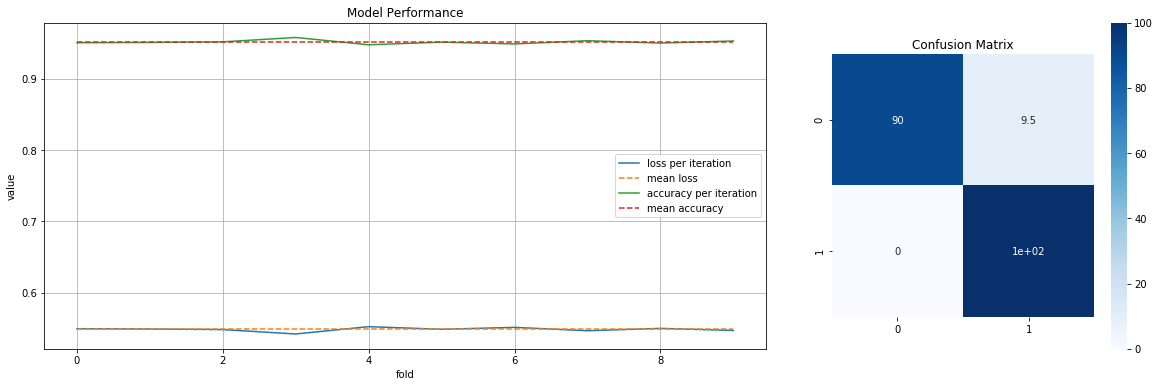

In [39]:
model = DecisionTreeClassifier(random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [40]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [41]:
performance

,FP,FN
MultinomialNB,8.688525,2.459016
BernoulliNB,1.885246,11.229508
LogisticRegression1,4.098361,5.327869
LogisticRegression2,3.688525,2.950820
SGDClassifierL1,4.508197,8.442623
SGDClassifierL2,3.770492,4.426230
SGDClassifierH1,3.606557,5.983607
SGDClassifierH2,2.622951,2.622951
SGDClassifierP1,37.786885,4.016393
SGDClassifierP2,7.704918,0.491803


Mean Loss 0.5281210219564395 +- 0.0035661793011719984


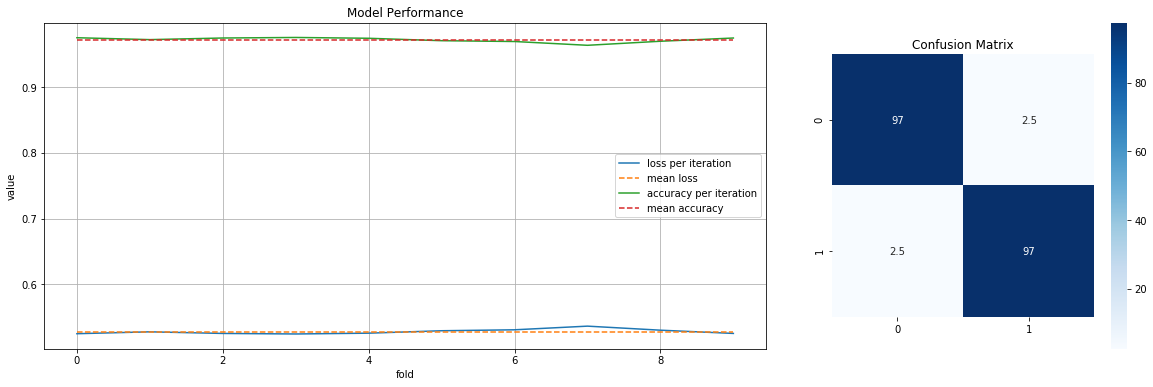

In [46]:
model = VotingClassifier(estimators=[
    ('MNB', MultinomialNB()),
    ('BNB', BernoulliNB()),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('DT', DecisionTreeClassifier(random_state=101)),
], weights=[1, 1, 1, 1, 1, 36, 1, 1, 1, 1])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [47]:
pickle.dump(vectorizer, open('Vectorizer-spam-2.pickle', 'wb'))

In [48]:
pickle.dump(v_model, open('SpamClassifier-2.pickle', 'wb'))